In [1]:
!pip install ultralytics -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 62.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzip the ASL dataset
!unzip -q "/content/drive/MyDrive/ASL-dataset.zip" -d "/content/dataset/"

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

# Dataset Visualization

In [5]:
label_map = {i: chr(65+i) for i in range(26)}

In [6]:
def vis_img_annotation(img_path, annotation_path):
    # Read the image
    img = cv2.imread(img_path)
    img_height, img_width, _ = img.shape
    # Read annotations
    with open(annotation_path, 'r') as f:
        annotations = f.readlines()
    # Process the first annotation (assuming single line for simplicity)
    annotations = annotations[0].split()
    label = int(annotations[0])
    x_center_norm = float(annotations[1])
    y_center_norm = float(annotations[2])
    w_norm = float(annotations[3])
    h_norm = float(annotations[4])
    # Convert normalized coordinates to actual pixel values
    x_center = int(x_center_norm * img_width)
    y_center = int(y_center_norm * img_height)
    w = int(w_norm * img_width)
    h = int(h_norm * img_height)
    # Calculate top-left corner of the bounding box
    x = x_center - w // 2
    y = y_center - h // 2
    # Draw rectangle and label
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, label_map[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    # Convert BGR to RGB for plt.imshow()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

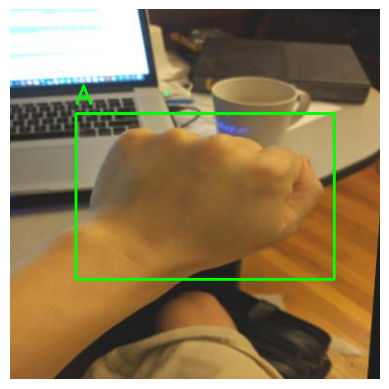

In [7]:
IMG_PATH = "/content/dataset/train/images/A0_jpg.rf.292a080422ba984985192f413101af41.jpg"
ANNOTATION_PATH = "/content/dataset/train/labels/A0_jpg.rf.292a080422ba984985192f413101af41.txt"
vis_img_annotation(IMG_PATH, ANNOTATION_PATH)

# Inference

## Image

In [8]:
import os

# load test data
def load_test():
  IMG_PATH = "/content/dataset/test/images"
  ANNOTATION_PATH = "/content/dataset/test/labels"
  test_img_paths = []
  test_annotation_paths = []
  for file in os.listdir(IMG_PATH):
    if file.endswith(".jpg"):
      test_img_paths.append(os.path.join(IMG_PATH, file))
  for file in os.listdir(ANNOTATION_PATH):
    if file.endswith(".txt"):
      test_annotation_paths.append(os.path.join(ANNOTATION_PATH, file))
  return sorted(test_img_paths), sorted(test_annotation_paths)

In [9]:
# load best weights
model = YOLO('/content/drive/MyDrive/Colab Notebooks/best_30epochs.pt')

In [10]:
test_image_paths, test_label_paths = load_test()

preds = model.predict(source=test_image_paths)


0: 640x640 1 A, 4.1ms
1: 640x640 1 B, 4.1ms
2: 640x640 1 B, 4.1ms
3: 640x640 1 B, 4.1ms
4: 640x640 1 C, 4.1ms
5: 640x640 1 C, 4.1ms
6: 640x640 1 C, 4.1ms
7: 640x640 1 C, 4.1ms
8: 640x640 1 D, 4.1ms
9: 640x640 1 F, 4.1ms
10: 640x640 1 F, 4.1ms
11: 640x640 1 G, 4.1ms
12: 640x640 1 G, 4.1ms
13: 640x640 1 G, 4.1ms
14: 640x640 1 G, 4.1ms
15: 640x640 1 H, 4.1ms
16: 640x640 1 H, 4.1ms
17: 640x640 1 H, 4.1ms
18: 640x640 1 G, 1 H, 4.1ms
19: 640x640 1 I, 4.1ms
20: 640x640 1 D, 4.1ms
21: 640x640 1 J, 4.1ms
22: 640x640 1 J, 4.1ms
23: 640x640 1 J, 4.1ms
24: 640x640 1 J, 4.1ms
25: 640x640 1 K, 4.1ms
26: 640x640 1 K, 4.1ms
27: 640x640 1 K, 4.1ms
28: 640x640 1 K, 4.1ms
29: 640x640 1 N, 4.1ms
30: 640x640 1 N, 4.1ms
31: 640x640 1 M, 4.1ms
32: 640x640 1 N, 4.1ms
33: 640x640 1 N, 4.1ms
34: 640x640 1 N, 4.1ms
35: 640x640 1 O, 4.1ms
36: 640x640 1 O, 4.1ms
37: 640x640 1 O, 4.1ms
38: 640x640 1 P, 4.1ms
39: 640x640 1 Q, 4.1ms
40: 640x640 (no detections), 4.1ms
41: 640x640 1 R, 4.1ms
42: 640x640 1 R, 4.1ms
43:

In [11]:
preds[0].boxes.data

tensor([[ 83.0586,  98.6621, 336.7852, 301.6291,   0.9778,   0.0000]], device='cuda:0')

## Video

# Plot Result for Test Data

In [12]:
def plot_image_with_labels(img_path, annotation_path, results):
    # Read the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read the original annotations
    with open(annotation_path, 'r') as file:
        original_labels = file.readlines()

    # Draw the original labels
    for label in original_labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_center *= img.shape[1]
        y_center *= img.shape[0]
        width *= img.shape[1]
        height *= img.shape[0]

        top_left = (int(x_center - width / 2), int(y_center - height / 2))
        bottom_right = (int(x_center + width / 2), int(y_center + height / 2))

        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        img = cv2.putText(img, f'True Label: {label_map[int(class_id)]}', (top_left[0], top_left[1] - 10),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Draw the predicted labels
    print(results[0].path)
    for box in results[0].boxes.data:
        x1, y1, x2, y2, confidence, class_id = box.tolist()
        x1, y1, x2, y2, class_id = map(int, [x1, y1, x2, y2, class_id])
        class_name = results.names[class_id]

        img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        img = cv2.putText(img, f'Predicted: {class_name} ({100*confidence:.2f}%)', (x1, y2 + 25),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Plot the image with labels
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

/content/dataset/test/images/N22_jpg.rf.ac8a6d5cd21bd7e4fd93128e6eb24329.jpg


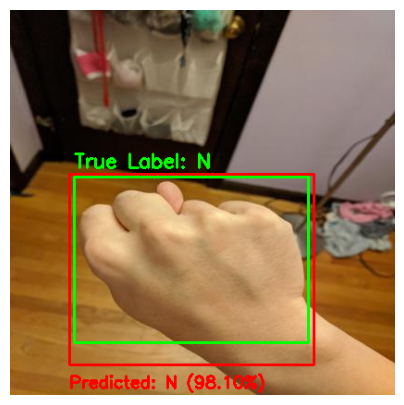

In [13]:
n = 32

plot_image_with_labels(test_image_paths[n], test_label_paths[n], preds[n])